In [1]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as sio
import io
import gsw

from scipy import integrate
from matplotlib import cm
from scipy.interpolate import interp1d

In [2]:
mdirec='/Users/tantanmeow/Desktop/WORK/2018-2019/Jesse/sp-tg/'

In [3]:
data_2014 = sio.loadmat(mdirec[:-7]+'/proc_data/'+'TY_P5_02_2014.mat',squeeze_me = True,struct_as_record = False)
data_2012 = sio.loadmat(mdirec[:-7]+'/proc_data/'+'TY_P5_00_2012.mat',squeeze_me = True,struct_as_record = False)


Critical level for unstable modes with growth rate greater than this $hr^{-1}$

In [4]:
GR_lm = 1

# 1. Along P5

a. ex1 (FG method, no filter v, no diffusivity)

b. ex2 (FG method, no filter v, real world diffusivity)

Text(0.5, 0, '$\\kappa$')

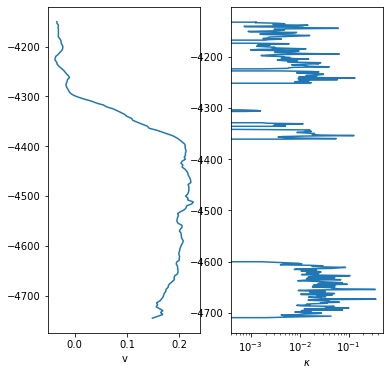

In [5]:
# to demonstrate
fig, ax =  plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
ax[0].plot(data_2012['v'][:,10],data_2012['z'][:,10])
ax[0].set_xlabel('v')
ax[1].plot(0.2*data_2012['eps'][:,10]/data_2012['N2_sorted'][:,10],data_2012['z'][:,10])
ax[1].set_xscale("log", base=10); ax[1].set_xlabel('$\kappa$')

In [6]:
GM_towyo_2012 = sio.loadmat(mdirec+'codes_new/'+'TG_SI_TY_P5_00_2012_ex2.mat',squeeze_me = True,struct_as_record = False)
GR_2012=GM_towyo_2012['GR_all']*3600
CL_2012=GM_towyo_2012['CL_all']
ERR_K_2012=GM_towyo_2012['ERR_K_all']
ERR_B_2012=GM_towyo_2012['ERR_B_all']

GM_towyo_2014 = sio.loadmat(mdirec+'codes_new/'+'TG_SI_TY_P5_02_2014_ex2.mat',squeeze_me = True,struct_as_record = False)
GR_2014=GM_towyo_2014['GR_all']*3600
CL_2014=GM_towyo_2014['CL_all']
ERR_K_2014=GM_towyo_2014['ERR_K_all']
ERR_B_2014=GM_towyo_2014['ERR_B_all']

GR_2012[GR_2012<0] = np.nan
GR_2014[GR_2014<0] = np.nan

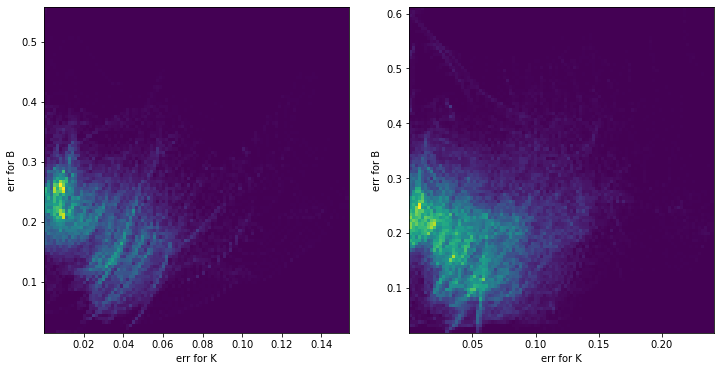

In [7]:
# check for errors
fig, ax =  plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].hist2d(ERR_K_2012.flatten()[GR_2012.flatten()>=GR_lm],ERR_B_2012.flatten()[GR_2012.flatten()>=GR_lm], bins=100)
ax[0].set_xlabel('err for K'); ax[0].set_ylabel('err for B'); 

ax[1].hist2d(ERR_K_2014.flatten()[GR_2014.flatten()>=GR_lm],ERR_B_2014.flatten()[GR_2014.flatten()>=GR_lm], bins=100)
ax[1].set_xlabel('err for K'); ax[1].set_ylabel('err for B'); 


<ipython-input-8-02d28b00bd09>:28: RuntimeWarning: All-NaN slice encountered
  if ~np.isnan(np.nanmax(GR_2012[i,:,:].flatten())):


Text(0.5, 1.0, 'P5 2012')

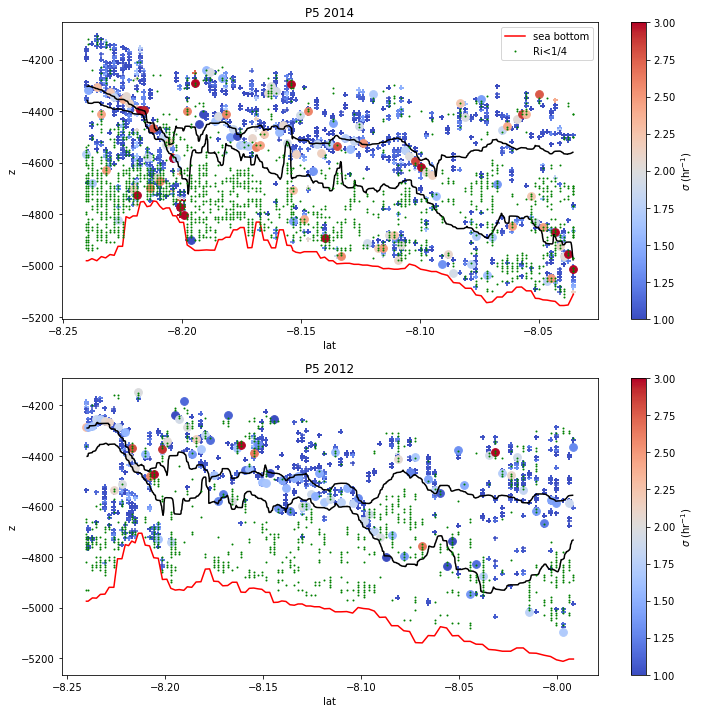

In [8]:
# critical level, GR along path
fig, ax =  plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
# ax[0].scatter(data_2014['lat'],data_2014['z'],c=data_2014['eps']) #c=np.log10(data_ex2['eps']))
ax[0].plot(data_2014['mlat'], -data_2014['bdepth'], 'r-', label='sea bottom')
ax[0].contour(data_2014['lat'],data_2014['z'],data_2014['sig4_sorted'],[1045.93, 1045.96],colors='k')
for i in range(len(GM_towyo_2014['LAT'])):  
    mask = GM_towyo_2014['Ri'][:,i]<1/4
    ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask])))*GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask], 'g.', ms=2)
ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask])))*GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask], 'g.', ms=2, label='Ri<1/4')
for i in range(len(GM_towyo_2014['LAT'])):  
    sc = ax[0].scatter(np.ones(len(CL_2014[i,:,:].flatten()[GR_2014[i,:,:].flatten()>=GR_lm]))*GM_towyo_2014['LAT'][i], CL_2014[i,:,:].flatten()[GR_2014[i,:,:].flatten()>=GR_lm],  c=GR_2014[i,:,:].flatten()[GR_2014[i,:,:].flatten()>=GR_lm], vmax=3, vmin=1, marker='+', s=25, cmap=cm.coolwarm)
for i in range(len(GM_towyo_2014['LAT'])):  
    if ~np.isnan(np.nanmax(GR_2014[i,:,:].flatten())):
        ax[0].scatter(GM_towyo_2014['LAT'][i], CL_2014[i,:,:].flatten()[np.nanargmax(GR_2014[i,:,:].flatten())],  c=np.nanmax(GR_2014[i,:,:].flatten()), vmax=3, vmin=1, marker='o', s=60, cmap=cm.coolwarm)
fig.colorbar(sc,label="$\sigma$ (hr$^{-1}$)",ax=ax[0])
ax[0].legend()
ax[0].set_xlabel('lat'); ax[0].set_ylabel('z'); ax[0].set_title('P5 2014')

# ax[1].scatter(data_2012['lat'],data_2012['z'],c=data_2012['eps']) #c=np.log10(data_ex2['eps']))
ax[1].plot(data_2012['mlat'], -data_2012['bdepth'], 'r-', label='sea bottom')
ax[1].contour(data_2012['lat'],data_2012['z'],data_2012['sig4_sorted'],[1045.93, 1045.96],colors='k')
for i in range(len(GM_towyo_2012['LAT'])):  
    mask = GM_towyo_2012['Ri'][:,i]<1/4
    ax[1].plot(np.ones((len(GM_towyo_2012['zw'][mask])))*GM_towyo_2012['LAT'][i], GM_towyo_2012['zw'][mask], 'g.', ms=2)
for i in range(len(GM_towyo_2012['LAT'])):  
    sc = ax[1].scatter(np.ones(len(CL_2012[i,:,:].flatten()[GR_2012[i,:,:].flatten()>=GR_lm]))*GM_towyo_2012['LAT'][i], CL_2012[i,:,:].flatten()[GR_2012[i,:,:].flatten()>=GR_lm], c=GR_2012[i,:,:].flatten()[GR_2012[i,:,:].flatten()>=GR_lm], vmax=3, vmin=1, marker='+', s=25, cmap=cm.coolwarm)
for i in range(len(GM_towyo_2012['LAT'])):  
    if ~np.isnan(np.nanmax(GR_2012[i,:,:].flatten())):
        ax[1].scatter(GM_towyo_2012['LAT'][i], CL_2012[i,:,:].flatten()[np.nanargmax(GR_2012[i,:,:].flatten())],  c=np.nanmax(GR_2012[i,:,:].flatten()), vmax=3, vmin=1, marker='o', s=60, cmap=cm.coolwarm)
fig.colorbar(sc,label="$\sigma$ (hr$^{-1}$)",ax=ax[1])
ax[1].set_xlabel('lat'); ax[1].set_ylabel('z'); ax[1].set_title('P5 2012')

In [9]:
# GR vs sig4_sorted
CL_2012_sig4 = np.zeros(CL_2012.shape) + np.nan
for i in range(len(GM_towyo_2012['LAT'])):  
    f=interp1d(data_2012['z'][:,i],data_2012['sig4_sorted'][:,i])
    CL_2012_sig4[i,:,:] = f(CL_2012[i,:,:])

CL_2014_sig4 = np.zeros(CL_2014.shape) + np.nan
for i in range(len(GM_towyo_2014['LAT'])):  
    f=interp1d(data_2014['z'][:,i],data_2014['sig4_sorted'][:,i])
    CL_2014_sig4[i,:,:] = f(CL_2014[i,:,:])


(45.99, 45.9)

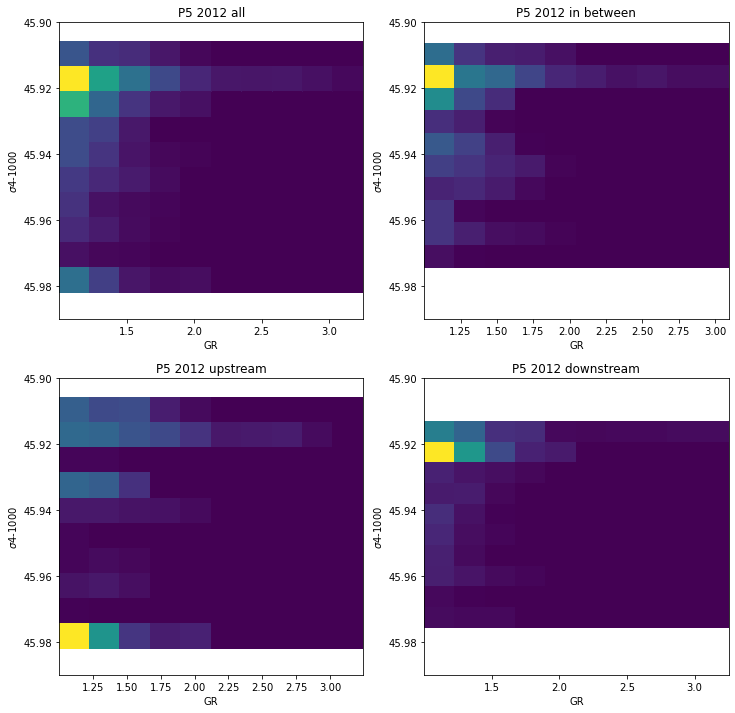

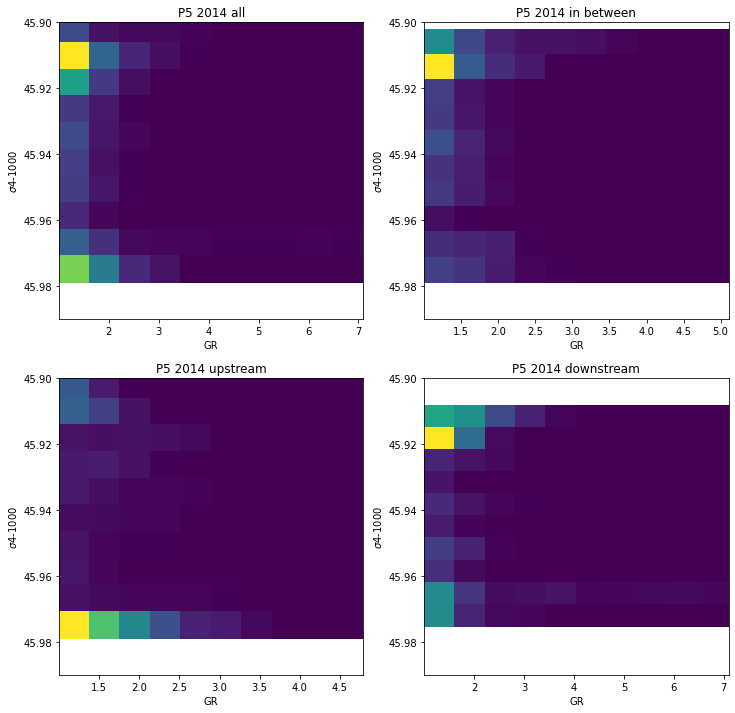

In [10]:
# 2012
fig, ax =  plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

nans = (~np.isnan(CL_2012_sig4.flatten()))*(GR_2012.flatten()>=GR_lm)
ax[0,0].hist2d(GR_2012.flatten()[nans],CL_2012_sig4.flatten()[nans]-1000)
ax[0,0].set_title('P5 2012 all'); ax[0,0].set_xlabel('GR'); ax[0,0].set_ylabel('$\sigma$4-1000'); ax[0,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2012_sig4[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()))*(GR_2012[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()>=GR_lm)
ax[0,1].hist2d(GR_2012[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()[nans],CL_2012_sig4[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()[nans]-1000)
ax[0,1].set_title('P5 2012 in between'); ax[0,1].set_xlabel('GR'); ax[0,1].set_ylabel('$\sigma$4-1000'); ax[0,1].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2012_sig4[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()))*(GR_2012[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()>=GR_lm)
ax[1,0].hist2d(GR_2012[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()[nans],CL_2012_sig4[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()[nans]-1000)
ax[1,0].set_title('P5 2012 upstream'); ax[1,0].set_xlabel('GR'); ax[1,0].set_ylabel('$\sigma$4-1000'); ax[1,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2012_sig4[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()))*(GR_2012[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()>=GR_lm)
ax[1,1].hist2d(GR_2012[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()[nans],CL_2012_sig4[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()[nans]-1000)
ax[1,1].set_title('P5 2012 downstream'); ax[1,1].set_xlabel('GR'); ax[1,1].set_ylabel('$\sigma$4-1000'); ax[1,1].set_ylim(45.99,45.9) 

# 2014
fig, ax =  plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

nans = (~np.isnan(CL_2014_sig4.flatten()))*(GR_2014.flatten()>=GR_lm)
ax[0,0].hist2d(GR_2014.flatten()[nans],CL_2014_sig4.flatten()[nans]-1000)
ax[0,0].set_title('P5 2014 all'); ax[0,0].set_xlabel('GR'); ax[0,0].set_ylabel('$\sigma$4-1000'); ax[0,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2014_sig4[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()))*(GR_2014[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()>=GR_lm)
ax[0,1].hist2d(GR_2014[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()[nans],CL_2014_sig4[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()[nans]-1000)
ax[0,1].set_title('P5 2014 in between'); ax[0,1].set_xlabel('GR'); ax[0,1].set_ylabel('$\sigma$4-1000'); ax[0,1].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2014_sig4[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()))*(GR_2014[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()>=GR_lm)
ax[1,0].hist2d(GR_2014[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()[nans],CL_2014_sig4[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()[nans]-1000)
ax[1,0].set_title('P5 2014 upstream'); ax[1,0].set_xlabel('GR'); ax[1,0].set_ylabel('$\sigma$4-1000'); ax[1,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2014_sig4[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()))*(GR_2014[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()>=GR_lm)
ax[1,1].hist2d(GR_2014[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()[nans],CL_2014_sig4[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()[nans]-1000)
ax[1,1].set_title('P5 2014 downstream'); ax[1,1].set_xlabel('GR'); ax[1,1].set_ylabel('$\sigma$4-1000'); ax[1,1].set_ylim(45.99,45.9) 


c. ex3 (FG method, 40-m filter v, real world diffusivity)

In [11]:
GM_towyo_2012 = sio.loadmat(mdirec+'codes_new/'+'TG_SI_TY_P5_00_2012_ex3.mat',squeeze_me = True,struct_as_record = False)
GR_2012=GM_towyo_2012['GR_all']*3600
CL_2012=GM_towyo_2012['CL_all']
ERR_K_2012=GM_towyo_2012['ERR_K_all']
ERR_B_2012=GM_towyo_2012['ERR_B_all']

GM_towyo_2014 = sio.loadmat(mdirec+'codes_new/'+'TG_SI_TY_P5_02_2014_ex3.mat',squeeze_me = True,struct_as_record = False)
GR_2014=GM_towyo_2014['GR_all']*3600
CL_2014=GM_towyo_2014['CL_all']
ERR_K_2014=GM_towyo_2014['ERR_K_all']
ERR_B_2014=GM_towyo_2014['ERR_B_all']

GR_2012[GR_2012<0] = np.nan
GR_2014[GR_2014<0] = np.nan

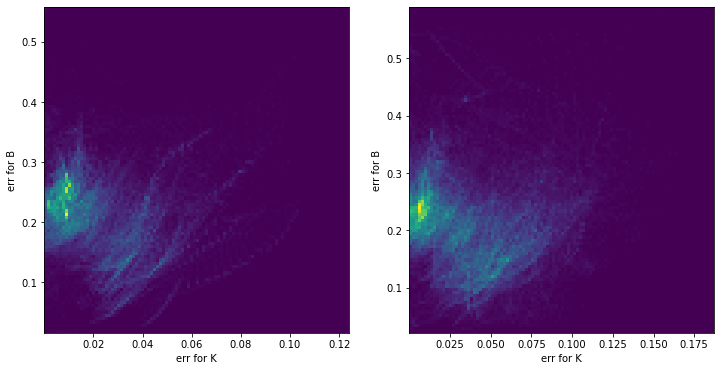

In [12]:
# check for errors
fig, ax =  plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].hist2d(ERR_K_2012.flatten()[(GR_2012.flatten()>=GR_lm)],ERR_B_2012.flatten()[(GR_2012.flatten()>=GR_lm)], bins=100)
ax[0].set_xlabel('err for K'); ax[0].set_ylabel('err for B'); 

ax[1].hist2d(ERR_K_2014.flatten()[(GR_2014.flatten()>=GR_lm)],ERR_B_2014.flatten()[(GR_2014.flatten()>=GR_lm)], bins=100)
ax[1].set_xlabel('err for K'); ax[1].set_ylabel('err for B'); 


Text(0.5, 1.0, 'P5 2012')

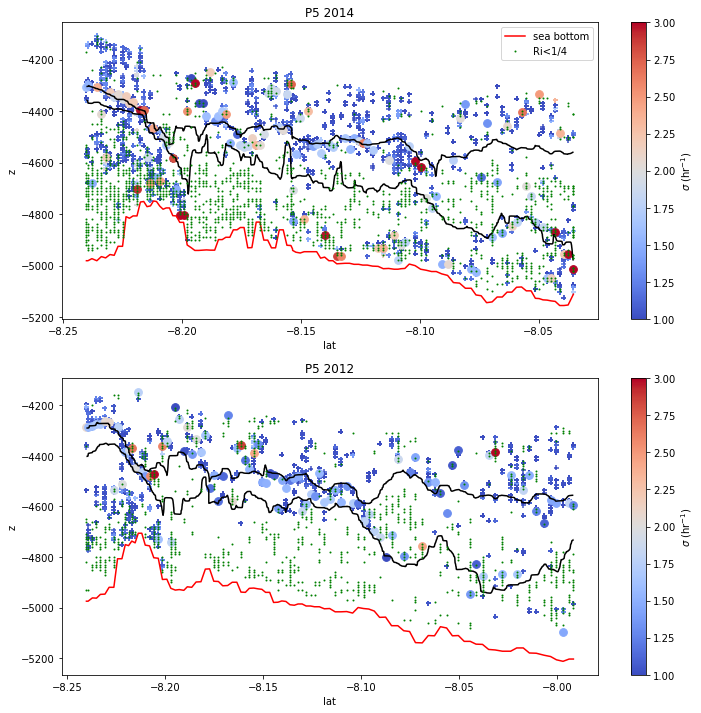

In [13]:
# critical level, GR along path
fig, ax =  plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
# ax[0].scatter(data_2014['lat'],data_2014['z'],c=data_2014['eps']) #c=np.log10(data_ex2['eps']))
ax[0].plot(data_2014['mlat'], -data_2014['bdepth'], 'r-', label='sea bottom')
ax[0].contour(data_2014['lat'],data_2014['z'],data_2014['sig4_sorted'],[1045.93, 1045.96],colors='k')
for i in range(len(GM_towyo_2014['LAT'])):  
    mask = GM_towyo_2014['Ri'][:,i]<1/4
    ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask])))*GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask], 'g.', ms=2)
ax[0].plot(np.ones((len(GM_towyo_2014['zw'][mask])))*GM_towyo_2014['LAT'][i], GM_towyo_2014['zw'][mask], 'g.', ms=2, label='Ri<1/4')
for i in range(len(GM_towyo_2014['LAT'])):  
    sc = ax[0].scatter(np.ones(len(CL_2014[i,:,:].flatten()[(GR_2014[i,:,:].flatten()>=GR_lm)]))*GM_towyo_2014['LAT'][i], CL_2014[i,:,:].flatten()[(GR_2014[i,:,:].flatten()>=GR_lm)],  c=GR_2014[i,:,:].flatten()[(GR_2014[i,:,:].flatten()>=GR_lm)], vmax=3, vmin=1, marker='+', s=25, cmap=cm.coolwarm)
for i in range(len(GM_towyo_2014['LAT'])):  
    if ~np.isnan(np.nanmax(GR_2014[i,:,:].flatten())):
        ax[0].scatter(GM_towyo_2014['LAT'][i], CL_2014[i,:,:].flatten()[np.nanargmax(GR_2014[i,:,:].flatten())],  c=np.nanmax(GR_2014[i,:,:].flatten()), vmax=3, vmin=1, marker='o', s=60, cmap=cm.coolwarm)
fig.colorbar(sc,label="$\sigma$ (hr$^{-1}$)",ax=ax[0])
ax[0].legend()
ax[0].set_xlabel('lat'); ax[0].set_ylabel('z'); ax[0].set_title('P5 2014')

# ax[1].scatter(data_2012['lat'],data_2012['z'],c=data_2012['eps']) #c=np.log10(data_ex2['eps']))
ax[1].plot(data_2012['mlat'], -data_2012['bdepth'], 'r-', label='sea bottom')
ax[1].contour(data_2012['lat'],data_2012['z'],data_2012['sig4_sorted'],[1045.93, 1045.96],colors='k')
for i in range(len(GM_towyo_2012['LAT'])):  
    mask = GM_towyo_2012['Ri'][:,i]<1/4
    ax[1].plot(np.ones((len(GM_towyo_2012['zw'][mask])))*GM_towyo_2012['LAT'][i], GM_towyo_2012['zw'][mask], 'g.', ms=2)
for i in range(len(GM_towyo_2012['LAT'])):  
    sc = ax[1].scatter(np.ones(len(CL_2012[i,:,:].flatten()[(GR_2012[i,:,:].flatten()>=GR_lm)]))*GM_towyo_2012['LAT'][i], CL_2012[i,:,:].flatten()[(GR_2012[i,:,:].flatten()>=GR_lm)],  c=GR_2012[i,:,:].flatten()[(GR_2012[i,:,:].flatten()>=GR_lm)], vmax=3, vmin=1, marker='+', s=25, cmap=cm.coolwarm)
for i in range(len(GM_towyo_2012['LAT'])):  
    if ~np.isnan(np.nanmax(GR_2012[i,:,:].flatten())):
        ax[1].scatter(GM_towyo_2012['LAT'][i], CL_2012[i,:,:].flatten()[np.nanargmax(GR_2012[i,:,:].flatten())],  c=np.nanmax(GR_2012[i,:,:].flatten()), vmax=3, vmin=1, marker='o', s=60, cmap=cm.coolwarm)
fig.colorbar(sc,label="$\sigma$ (hr$^{-1}$)",ax=ax[1])
ax[1].set_xlabel('lat'); ax[1].set_ylabel('z'); ax[1].set_title('P5 2012')

In [14]:
# GR vs sig4_sorted
CL_2012_sig4 = np.zeros(CL_2012.shape) + np.nan
for i in range(len(GM_towyo_2012['LAT'])):  
    f=interp1d(data_2012['z'][:,i],data_2012['sig4_sorted'][:,i])
    CL_2012_sig4[i,:,:] = f(CL_2012[i,:,:])

CL_2014_sig4 = np.zeros(CL_2014.shape) + np.nan
for i in range(len(GM_towyo_2014['LAT'])):  
    f=interp1d(data_2014['z'][:,i],data_2014['sig4_sorted'][:,i])
    CL_2014_sig4[i,:,:] = f(CL_2014[i,:,:])


(45.99, 45.9)

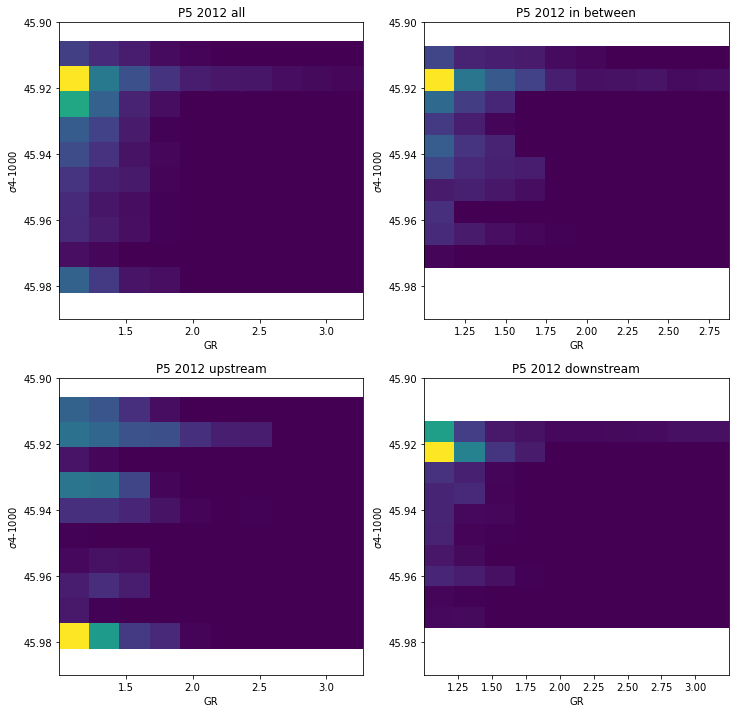

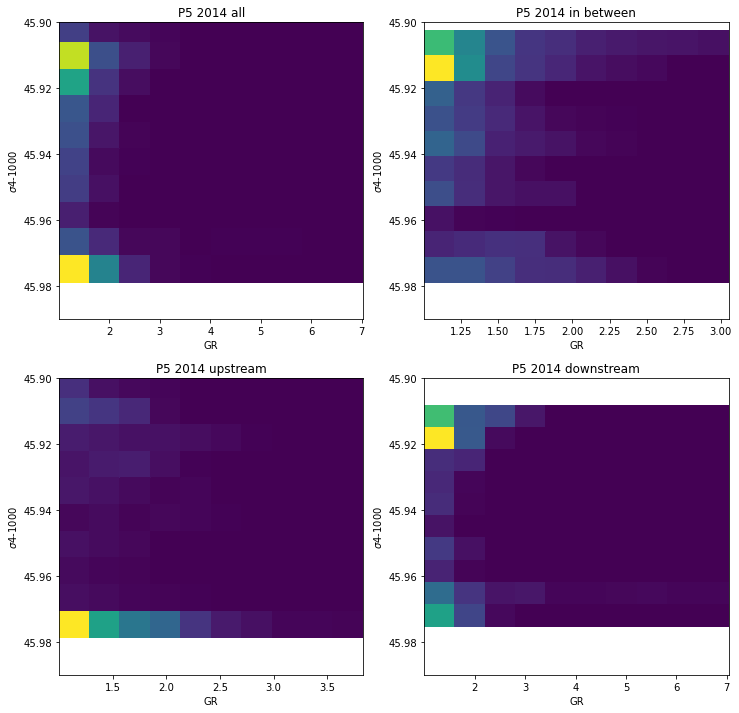

In [15]:
# 2012
fig, ax =  plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

nans = (~np.isnan(CL_2012_sig4.flatten()))*(GR_2012.flatten()>=GR_lm)
ax[0,0].hist2d(GR_2012.flatten()[nans],CL_2012_sig4.flatten()[nans]-1000)
ax[0,0].set_title('P5 2012 all'); ax[0,0].set_xlabel('GR'); ax[0,0].set_ylabel('$\sigma$4-1000'); ax[0,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2012_sig4[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()))*(GR_2012[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()>=GR_lm)
ax[0,1].hist2d(GR_2012[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()[nans],CL_2012_sig4[(GM_towyo_2012['LAT']<-8.1)*(GM_towyo_2012['LAT']>-8.2),:,:].flatten()[nans]-1000)
ax[0,1].set_title('P5 2012 in between'); ax[0,1].set_xlabel('GR'); ax[0,1].set_ylabel('$\sigma$4-1000'); ax[0,1].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2012_sig4[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()))*(GR_2012[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()>=GR_lm)
ax[1,0].hist2d(GR_2012[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()[nans],CL_2012_sig4[GM_towyo_2012['LAT']<=-8.2,:,:].flatten()[nans]-1000)
ax[1,0].set_title('P5 2012 upstream'); ax[1,0].set_xlabel('GR'); ax[1,0].set_ylabel('$\sigma$4-1000'); ax[1,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2012_sig4[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()))*(GR_2012[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()>=GR_lm)
ax[1,1].hist2d(GR_2012[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()[nans],CL_2012_sig4[GM_towyo_2012['LAT']>=-8.1,:,:].flatten()[nans]-1000)
ax[1,1].set_title('P5 2012 downstream'); ax[1,1].set_xlabel('GR'); ax[1,1].set_ylabel('$\sigma$4-1000'); ax[1,1].set_ylim(45.99,45.9) 

# 2014
fig, ax =  plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

nans = (~np.isnan(CL_2014_sig4.flatten()))*(GR_2014.flatten()>=GR_lm)
ax[0,0].hist2d(GR_2014.flatten()[nans],CL_2014_sig4.flatten()[nans]-1000)
ax[0,0].set_title('P5 2014 all'); ax[0,0].set_xlabel('GR'); ax[0,0].set_ylabel('$\sigma$4-1000'); ax[0,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2014_sig4[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()))*(GR_2014[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()>=GR_lm)
ax[0,1].hist2d(GR_2014[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()[nans],CL_2014_sig4[(GM_towyo_2014['LAT']<-8.1)*(GM_towyo_2014['LAT']>-8.2),:,:].flatten()[nans]-1000)
ax[0,1].set_title('P5 2014 in between'); ax[0,1].set_xlabel('GR'); ax[0,1].set_ylabel('$\sigma$4-1000'); ax[0,1].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2014_sig4[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()))*(GR_2014[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()>=GR_lm)
ax[1,0].hist2d(GR_2014[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()[nans],CL_2014_sig4[GM_towyo_2014['LAT']<=-8.2,:,:].flatten()[nans]-1000)
ax[1,0].set_title('P5 2014 upstream'); ax[1,0].set_xlabel('GR'); ax[1,0].set_ylabel('$\sigma$4-1000'); ax[1,0].set_ylim(45.99,45.9) 

nans = (~np.isnan(CL_2014_sig4[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()))*(GR_2014[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()>=GR_lm)
ax[1,1].hist2d(GR_2014[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()[nans],CL_2014_sig4[GM_towyo_2014['LAT']>=-8.1,:,:].flatten()[nans]-1000)
ax[1,1].set_title('P5 2014 downstream'); ax[1,1].set_xlabel('GR'); ax[1,1].set_ylabel('$\sigma$4-1000'); ax[1,1].set_ylim(45.99,45.9) 


# 2. All P5 profiles

In [16]:
def dataFGM(section, exnum):
    import os
    import glob

    towyo_files = np.sort(glob.glob(os.path.join(mdirec + 'codes_new/TG_SI_TY_' + section + "*" + exnum + "*")))

    # Growth rate, imaginary phase speed, real phase speed, numbers of zero-crossing, wave vector of the FGM
    GRs = np.squeeze(np.concatenate([sio.loadmat(file)["GR"] for file in towyo_files] , axis=0))
    CLs = np.squeeze(np.concatenate([sio.loadmat(file)["CL"] for file in towyo_files] , axis=0))
    CIs = np.squeeze(np.concatenate([sio.loadmat(file)["CI"] for file in towyo_files] , axis=0))
    CRs = np.squeeze(np.concatenate([sio.loadmat(file)["CR"] for file in towyo_files] , axis=0))
    IIs = np.squeeze(np.concatenate([sio.loadmat(file)["II"] for file in towyo_files] , axis=0))
    KFGMs = np.squeeze(np.concatenate([sio.loadmat(file)["KFGM"] for file in towyo_files] , axis=0))
    LONs = np.squeeze(np.concatenate([sio.loadmat(file)["LON"] for file in towyo_files] , axis=-1))
    LATs = np.squeeze(np.concatenate([sio.loadmat(file)["LAT"] for file in towyo_files] , axis=-1))

    # profiles
    Bs = np.squeeze(np.concatenate([sio.loadmat(file)["B"] for file in towyo_files] , axis=-1))
    N2s = np.squeeze(np.concatenate([sio.loadmat(file)["N2"] for file in towyo_files] , axis=-1))
    Ris = np.squeeze(np.concatenate([sio.loadmat(file)["Ri"] for file in towyo_files] , axis=-1))
    Vs = np.squeeze(np.concatenate([sio.loadmat(file)["V"] for file in towyo_files] , axis=-1))
    Vzs = np.squeeze(np.concatenate([sio.loadmat(file)["Vz"] for file in towyo_files] , axis=-1))
    Vzzs = np.squeeze(np.concatenate([sio.loadmat(file)["Vzz"] for file in towyo_files] , axis=-1))

    # FGM in terms of w
    Ws = np.squeeze(np.concatenate([sio.loadmat(file)["W"] for file in towyo_files] , axis=-1))
    
    # For all the growing modes
    GR_alls = np.squeeze(np.concatenate([sio.loadmat(file)["GR_all"] for file in towyo_files] , axis=0))
    CR_alls = np.squeeze(np.concatenate([sio.loadmat(file)["CR_all"] for file in towyo_files] , axis=0))
    CL_alls = np.squeeze(np.concatenate([sio.loadmat(file)["CL_all"] for file in towyo_files] , axis=0))
    ERR_K_alls = np.squeeze(np.concatenate([sio.loadmat(file)["ERR_K_all"] for file in towyo_files] , axis=0))
    ERR_B_alls = np.squeeze(np.concatenate([sio.loadmat(file)["ERR_B_all"] for file in towyo_files] , axis=0))

    # interface height, bottom height, crtical level (w maximum) 
    towyo_files_others = np.sort(glob.glob(os.path.join(mdirec[:-6] + 'proc_data/TY_' + section + "*")))
    zw = np.squeeze(sio.loadmat(towyo_files[0])["zw"])
    k = np.squeeze(sio.loadmat(towyo_files[0])["K"])
    l = np.squeeze(sio.loadmat(towyo_files[0])["L"])
    ideps = np.squeeze(np.concatenate([sio.loadmat(file)["zo"] for file in towyo_files_others] , axis=1))
    bdeps = np.squeeze(np.concatenate([sio.loadmat(file)["bdepth"] for file in towyo_files_others] , axis=1))    
    cdeps = np.zeros(LONs.shape, dtype='f')
    nans = np.isnan(np.nanmax(Ws.real, axis=0))
    cdeps[~nans] = zw[np.int_(np.nanargmax(Ws.real[:,~nans], axis=0))]
    cdeps[nans] = np.nan
    
    # compute the density level of critical level 
    CL_sig4s = np.array([])
    CL_sig4_alls = np.array([])
    sig4s = np.array([])
    for file in range(len(towyo_files)):
        CL = np.squeeze(sio.loadmat(towyo_files[file])["CL"])
        CL_all = np.squeeze(sio.loadmat(towyo_files[file])["CL_all"])
        CR = np.squeeze(sio.loadmat(towyo_files[file])["CR"])
        CR_all = np.squeeze(sio.loadmat(towyo_files[file])["CR_all"])
        z = np.squeeze(sio.loadmat(towyo_files_others[file])["z"])
        sig4_sorted = np.squeeze(sio.loadmat(towyo_files_others[file])["sig4_sorted"])
        sig4 = np.zeros((len(zw),len(CL))) + np.nan
        CL_sig4 = np.zeros(CL.shape) + np.nan
        CL_sig4_all = np.zeros(CL_all.shape) + np.nan
        for i in range(CL_sig4.shape[0]):
            f=interp1d(z[:,i],sig4_sorted[:,i], bounds_error=False, fill_value=np.nan)
            CL_sig4[i] = f(CL[i])
            CL_sig4_all[i,:,:] = f(CL_all[i,:,:]) 
            sig4[:,i] = f(zw) 
        if file==0:
            CL_sig4s = CL_sig4
            CL_sig4_alls = CL_sig4_all
            sig4s = sig4
        else:
            CL_sig4s = np.concatenate([CL_sig4s , CL_sig4], axis=0)
            CL_sig4_alls = np.concatenate([CL_sig4_alls , CL_sig4_all], axis=0)
            sig4s = np.concatenate([sig4s , sig4], axis=1)
    
    FGM_towyo = xr.Dataset({'GR': (['site'], GRs*3600), 
                           'CL': (['site'], CLs),
                           'CL_sig4': (['site'], CL_sig4s),
                           'CI': (['site'], CIs),
                           'CR': (['site'], CRs),
                           'II': (['site'], IIs), 
                           'K': (['site','vector'], KFGMs),
                           'LON': (['site'], LONs), 
                           'LAT': (['site'], LATs), 
                           'zo': (['site'], ideps), 
                           'bdepth': (['site'], -bdeps),
                           'cdepth': (['site'], cdeps),
                           'iab': (['site'], ideps+bdeps),
                           'cab': (['site'], cdeps+bdeps),
                           'b': (['z', 'site'], Bs),
                           'N2': (['z', 'site'], N2s),
                           'Ri': (['z', 'site'], Ris),
                           'V': (['z', 'site'], Vs),
                           'Vz': (['z', 'site'], Vzs),
                           'Vzz': (['z', 'site'], Vzzs),
                           'sig4': (['z', 'site'], sig4s),
                           'GR_all': (['site', 'k', 'l'], GR_alls*3600),
                           'CR_all': (['site', 'k', 'l'], CR_alls),
                           'CL_all': (['site', 'k', 'l'], CL_alls),
                           'CL_sig4_all': (['site', 'k', 'l'], CL_sig4_alls),
                           'ERR_K_all': (['site', 'k', 'l'], ERR_K_alls),
                           'ERR_B_all': (['site', 'k', 'l'], ERR_B_alls)},
                           coords={'site': np.arange(len(LONs)),
                                   'z': zw,
                                   'k': k,
                                   'l': l},
                           attrs={'title': 'FGM, tow-yo profiles'})
    return FGM_towyo

ex2 (FG method, no filter v, real world diffusivity)

In [17]:
FGM_towyo_P5 = dataFGM("P5", "ex2")

<ipython-input-16-b859ebfe1c6c>:43: RuntimeWarning: All-NaN slice encountered
  nans = np.isnan(np.nanmax(Ws.real, axis=0))


## 1) Fastest growing modes

a. Growth rate

Mean growth rate in P5 = 1.9$hr^{-1}$


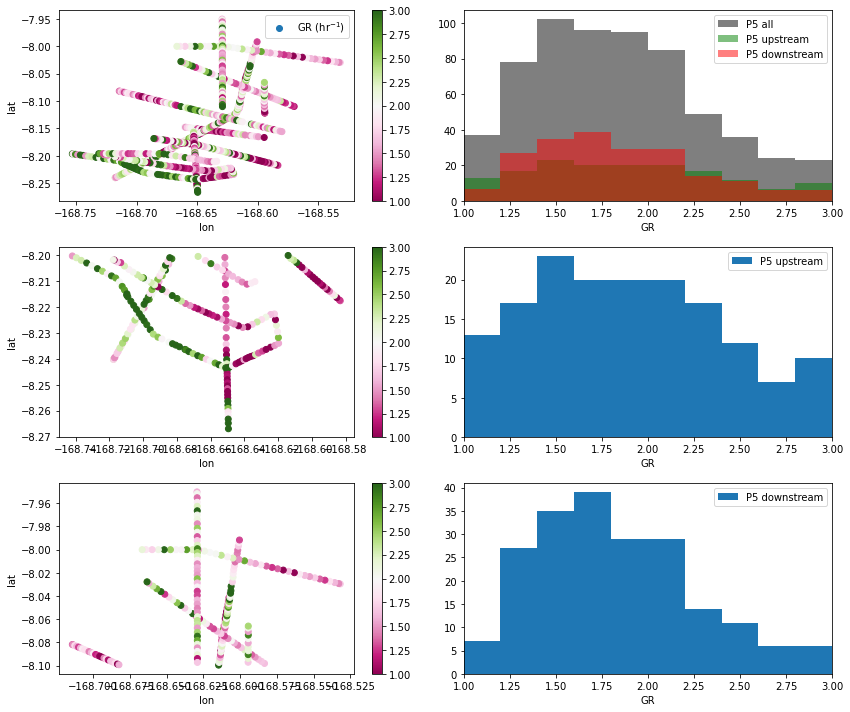

In [18]:
fig, ax =  plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sc = ax[0,0].scatter(FGM_towyo_P5.LON, FGM_towyo_P5.LAT, c=FGM_towyo_P5.GR, marker='o',vmax=3, vmin=1, cmap=cm.PiYG, label='GR (hr$^{-1}$)')
ax[0,0].set_xlabel('lon'); ax[0,0].set_ylabel('lat'); ax[0,0].legend()
fig.colorbar(sc,label=" ",ax=ax[0,0])
# all stations 
ax[0,1].hist(FGM_towyo_P5.GR, facecolor='k', alpha=0.5, label='P5 all', range = (1,3), bins=10)
# upstream and near the crest of the sill (south of 8.2S)
ax[0,1].hist(FGM_towyo_P5.GR[FGM_towyo_P5.LAT<=-8.2], facecolor='g', alpha=0.5, label='P5 upstream', range = (1,3), bins=10)
# downstream (north of 8.1S)
ax[0,1].hist(FGM_towyo_P5.GR[FGM_towyo_P5.LAT>=-8.1], facecolor='r', alpha=0.5, label='P5 downstream', range = (1,3), bins=10)
ax[0,1].set_xlabel('GR'); ax[0,1].set_ylabel(''); ax[0,1].legend(); ax[0,1].set_xlim([1,3])

# upstream
sc = ax[1,0].scatter(FGM_towyo_P5.LON[FGM_towyo_P5.LAT<=-8.2], FGM_towyo_P5.LAT[FGM_towyo_P5.LAT<=-8.2], c=FGM_towyo_P5.GR[FGM_towyo_P5.LAT<=-8.2], marker='o',vmax=3, vmin=1, cmap=cm.PiYG, label='GR (hr$^{-1}$)')
ax[1,0].set_xlabel('lon'); ax[1,0].set_ylabel('lat'); # ax[1,0].legend()
fig.colorbar(sc,label=" ",ax=ax[1,0])
ax[1,1].hist(FGM_towyo_P5.GR[FGM_towyo_P5.LAT<=-8.2], label='P5 upstream', range = (1,3), bins=10)
ax[1,1].set_xlabel('GR'); ax[1,1].set_ylabel(''); ax[1,1].legend(); ax[1,1].set_xlim([1,3])

# downstream
sc = ax[2,0].scatter(FGM_towyo_P5.LON[FGM_towyo_P5.LAT>=-8.1], FGM_towyo_P5.LAT[FGM_towyo_P5.LAT>=-8.1], c=FGM_towyo_P5.GR[FGM_towyo_P5.LAT>=-8.1], marker='o',vmax=3, vmin=1, cmap=cm.PiYG, label='GR (hr$^{-1}$)')
ax[2,0].set_xlabel('lon'); ax[2,0].set_ylabel('lat'); # ax[1,0].legend()
fig.colorbar(sc,label=" ",ax=ax[2,0])
ax[2,1].hist(FGM_towyo_P5.GR[FGM_towyo_P5.LAT>=-8.1], label='P5 downstream', range = (1,3), bins=10)
ax[2,1].set_xlabel('GR'); ax[2,1].set_ylabel(''); ax[2,1].legend(); ax[2,1].set_xlim([1,3])

fig.tight_layout()

print('Mean growth rate in P5 = ' + str(FGM_towyo_P5.GR.mean().data.round(1)) + '$hr^{-1}$')

b. critical level

Mean critical level in P5 locates at : 45.9380000000001$\sigma_4$


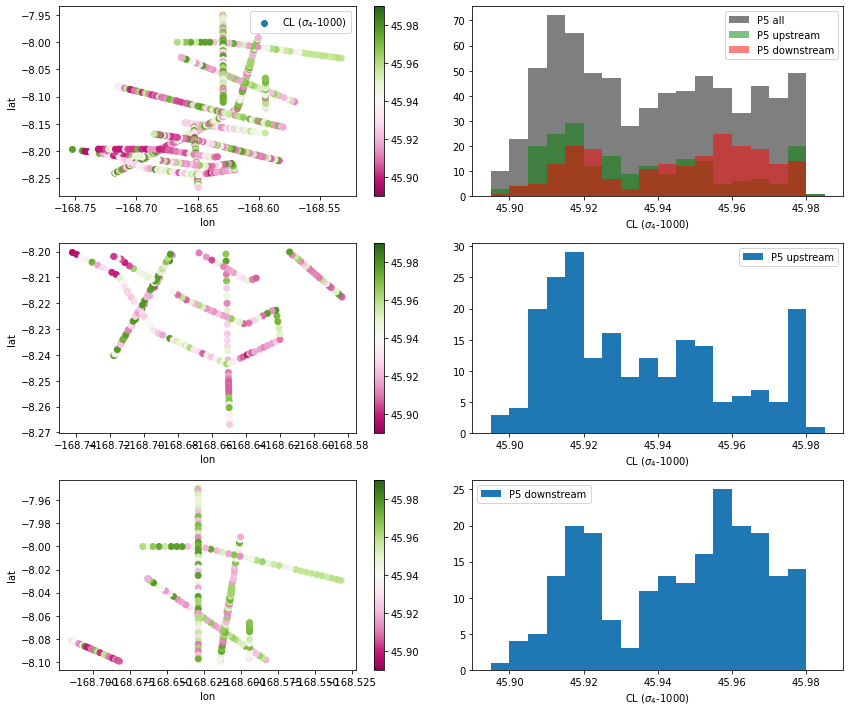

In [19]:
fig, ax =  plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sc = ax[0,0].scatter(FGM_towyo_P5.LON, FGM_towyo_P5.LAT, c=FGM_towyo_P5.CL_sig4-1000, marker='o',vmax=45.99, vmin=45.89, cmap=cm.PiYG, label='CL ($\sigma_4$-1000)')
ax[0,0].set_xlabel('lon'); ax[0,0].set_ylabel('lat'); ax[0,0].legend()
fig.colorbar(sc,label=" ",ax=ax[0,0])
# all stations 
ax[0,1].hist(FGM_towyo_P5.CL_sig4-1000, facecolor='k', alpha=0.5, label='P5 all', range = (45.89,45.99), bins=20)
# upstream and near the crest of the sill (south of 8.2S)
ax[0,1].hist(FGM_towyo_P5.CL_sig4[FGM_towyo_P5.LAT<=-8.2]-1000, facecolor='g', alpha=0.5, label='P5 upstream', range = (45.89,45.99), bins=20)
# downstream (north of 8.1S)
ax[0,1].hist(FGM_towyo_P5.CL_sig4[FGM_towyo_P5.LAT>=-8.1]-1000, facecolor='r', alpha=0.5, label='P5 downstream', range = (45.89,45.99), bins=20)
ax[0,1].set_xlabel('CL ($\sigma_4$-1000)'); ax[0,1].set_ylabel(''); ax[0,1].legend(); ax[0,1].set_xlim([45.89,45.99])

# upstream
sc = ax[1,0].scatter(FGM_towyo_P5.LON[FGM_towyo_P5.LAT<=-8.2], FGM_towyo_P5.LAT[FGM_towyo_P5.LAT<=-8.2], c=FGM_towyo_P5.CL_sig4[FGM_towyo_P5.LAT<=-8.2]-1000, marker='o',vmax=45.99, vmin=45.89, cmap=cm.PiYG, label='CL ($\sigma_4$-1000)')
ax[1,0].set_xlabel('lon'); ax[1,0].set_ylabel('lat'); # ax[1,0].legend()
fig.colorbar(sc,label=" ",ax=ax[1,0])
ax[1,1].hist(FGM_towyo_P5.CL_sig4[FGM_towyo_P5.LAT<=-8.2]-1000, label='P5 upstream', range = (45.89,45.99), bins=20)
ax[1,1].set_xlabel('CL ($\sigma_4$-1000)'); ax[1,1].set_ylabel(''); ax[1,1].legend(); ax[1,1].set_xlim([45.89,45.99])

# downstream
sc = ax[2,0].scatter(FGM_towyo_P5.LON[FGM_towyo_P5.LAT>=-8.1], FGM_towyo_P5.LAT[FGM_towyo_P5.LAT>=-8.1], c=FGM_towyo_P5.CL_sig4[FGM_towyo_P5.LAT>=-8.1]-1000, marker='o',vmax=45.99, vmin=45.89, cmap=cm.PiYG, label='CL ($\sigma_4$-1000)')
ax[2,0].set_xlabel('lon'); ax[2,0].set_ylabel('lat'); # ax[1,0].legend()
fig.colorbar(sc,label=" ",ax=ax[2,0])
ax[2,1].hist(FGM_towyo_P5.CL_sig4[FGM_towyo_P5.LAT>=-8.1]-1000, label='P5 downstream', range = (45.89,45.99), bins=20)
ax[2,1].set_xlabel('CL ($\sigma_4$-1000)'); ax[2,1].set_ylabel(''); ax[2,1].legend(); ax[2,1].set_xlim([45.89,45.99])

fig.tight_layout()

print('Mean critical level in P5 locates at : ' + str(FGM_towyo_P5.CL_sig4.mean().data.round(3)-1000) + '$\sigma_4$')

## 2) All growing modes

Mean growth rate in P5 = 1.5$hr^{-1}$
Mean critical level in P5 = nan$\sigma_4$
Mean real phase speed in P5 = 0.1$ms^{-1}$


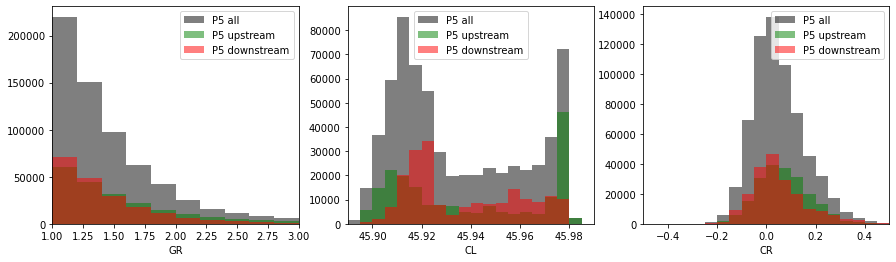

In [20]:
fig, ax =  plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
# GR
# all stations 
nans = (FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)
ax[0].hist(FGM_towyo_P5.GR_all.data.flatten()[nans], facecolor='k', alpha=0.5, label='P5 all', range = (GR_lm,3), bins=10)
# upstream and near the crest of the sill (south of 8.2S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()>=GR_lm)
ax[0].hist(FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()[nans], facecolor='g', alpha=0.5, label='P5 upstream', range = (GR_lm,3), bins=10)
# downstream (north of 8.1S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()>=GR_lm)
ax[0].hist(FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()[nans], facecolor='r', alpha=0.5, label='P5 downstream', range = (GR_lm,3), bins=10)
ax[0].set_xlabel('GR'); ax[0].set_ylabel(''); ax[0].legend(); ax[0].set_xlim([GR_lm,3])

# CL
# all stations 
nans = (FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)
ax[1].hist(FGM_towyo_P5.CL_sig4_all.data.flatten()[nans]-1000, facecolor='k', alpha=0.5, label='P5 all', range = (45.89,45.99), bins=20)
# upstream and near the crest of the sill (south of 8.2S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()>=GR_lm)
ax[1].hist(FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()[nans]-1000, facecolor='g', alpha=0.5, label='P5 upstream', range = (45.89,45.99), bins=20)
# downstream (north of 8.1S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()>=GR_lm)
ax[1].hist(FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()[nans]-1000, facecolor='r', alpha=0.5, label='P5 downstream', range = (45.89,45.99), bins=20)
ax[1].set_xlabel('CL'); ax[1].set_ylabel(''); ax[1].legend(); ax[1].set_xlim([45.89,45.99])

# CR
# all stations 
nans = (FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)
ax[-1].hist(FGM_towyo_P5.CR_all.data.flatten()[nans], facecolor='k', alpha=0.5, label='P5 all', range = (-.5,.5), bins=20)
# upstream and near the crest of the sill (south of 8.2S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()>=GR_lm)
ax[-1].hist(FGM_towyo_P5.CR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()[nans], facecolor='g', alpha=0.5, label='P5 upstream', range = (-.5,.5), bins=20)
# downstream (north of 8.1S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()>=GR_lm)
ax[-1].hist(FGM_towyo_P5.CR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()[nans], facecolor='r', alpha=0.5, label='P5 downstream', range = (-.5,.5), bins=20)
ax[-1].set_xlabel('CR'); ax[-1].set_ylabel(''); ax[-1].legend(); ax[-1].set_xlim([-.5,.5])

print('Mean growth rate in P5 = ' + str(FGM_towyo_P5.GR_all.data.flatten()[(FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)].mean().round(1)) + '$hr^{-1}$')
print('Mean critical level in P5 = ' + str(FGM_towyo_P5.CL_sig4_all.data.flatten()[(FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)].mean().round(3)-1000) + '$\sigma_4$')
print('Mean real phase speed in P5 = ' + str(FGM_towyo_P5.CR_all.data.flatten()[(FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)].mean().round(1)) + '$ms^{-1}$')


<a list of 9 text.Text objects>

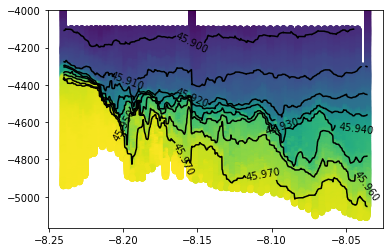

In [21]:
plt.scatter(data_2014['lat'],data_2014['z'],c=data_2014['sig4']-1000) 
sc=plt.contour(data_2014['lat'],data_2014['z'],data_2014['sig4_sorted']-1000,np.arange(45.90,45.981,0.01),colors='k')
plt.clabel(sc)

why does u and v at the scale of 10 for station 16 in TY_P5_00_2012 section?


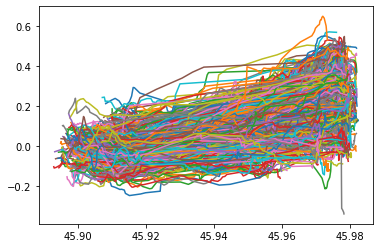

In [22]:
plt.plot(FGM_towyo_P5.sig4-1000,FGM_towyo_P5.V)
print('why does u and v at the scale of 10 for station 16 in TY_P5_00_2012 section?')

# FGM_towyo_P5.V.data[np.abs(FGM_towyo_P5.V.data)>10] = np.nan

In [23]:
# profiles in sigma4 coordinate
sig4w = np.arange(45.88,45.99,0.001)+1000
V_sig4w = np.zeros((len(sig4w), len(FGM_towyo_P5.site))) + np.nan
Vz_sig4w = np.zeros((len(sig4w), len(FGM_towyo_P5.site))) + np.nan
N2_sig4w = np.zeros((len(sig4w), len(FGM_towyo_P5.site))) + np.nan
Ri_sig4w = np.zeros((len(sig4w), len(FGM_towyo_P5.site))) + np.nan
for i in range(len(FGM_towyo_P5.site)):
    f=interp1d(FGM_towyo_P5.sig4[:,i], FGM_towyo_P5.V[:,i], bounds_error=False, fill_value=np.nan)
    V_sig4w[:,i] = f(sig4w)
    f=interp1d(FGM_towyo_P5.sig4[:,i], FGM_towyo_P5.Vz[:,i], bounds_error=False, fill_value=np.nan)
    Vz_sig4w[:,i] = f(sig4w)
    f=interp1d(FGM_towyo_P5.sig4[:,i], FGM_towyo_P5.N2[:,i], bounds_error=False, fill_value=np.nan)
    N2_sig4w[:,i] = f(sig4w)
    f=interp1d(FGM_towyo_P5.sig4[:,i], FGM_towyo_P5.Ri[:,i], bounds_error=False, fill_value=np.nan)
    Ri_sig4w[:,i] = f(sig4w)


/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-24-2ec8b5ec561f>:17: RuntimeWarning: Mean of empty slice
  ax[0].plot(np.nanmean(V_sig4w, axis=1)*100000, sig4w-1000, 'b', label='$\overline{V}$')
/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-24-2ec8b5ec561f>:24: RuntimeWarning: Mean of empty slice
  ax[1].plot(np.nanmean(V_sig4w, axis=1), sig4w-1000, 'y', label='$\overline{V}$')
/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/lib/nan

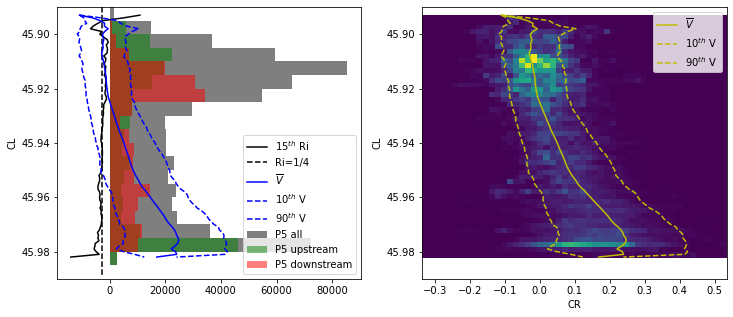

In [24]:
# CL
# all stations 
fig, ax =  plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
nans = (FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)
ax[0].hist(FGM_towyo_P5.CL_sig4_all.data.flatten()[nans]-1000, facecolor='k', alpha=0.5, label='P5 all', range = (45.89,45.99), bins=20, orientation='horizontal')
# upstream and near the crest of the sill (south of 8.2S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()>=GR_lm)
ax[0].hist(FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()[nans]-1000, facecolor='g', alpha=0.5, label='P5 upstream', range = (45.89,45.99), bins=20, orientation='horizontal')
# downstream (north of 8.1S)
nans = (FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()>=GR_lm)
ax[0].hist(FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()[nans]-1000, facecolor='r', alpha=0.5, label='P5 downstream', range = (45.89,45.99), bins=20, orientation='horizontal')
ax[0].set_ylabel('CL'); ax[0].set_xlabel(''); ax[0].set_ylim([45.89,45.99])

ax[0].plot(np.log10(np.nanpercentile(Ri_sig4w, 15, axis=1))*10000, sig4w-1000, 'k', label='$15^{th}$ Ri')
ax[0].plot(np.log10([1/4, 1/4])*5000, [sig4w[0]-1000, sig4w[-1]-1000], 'k--', label='Ri=1/4')

ax[0].plot(np.nanmean(V_sig4w, axis=1)*100000, sig4w-1000, 'b', label='$\overline{V}$')
ax[0].plot(np.nanpercentile(V_sig4w, 10, axis=1)*100000, sig4w-1000, 'b--', label='$10^{th}$ V')
ax[0].plot(np.nanpercentile(V_sig4w, 90, axis=1)*100000, sig4w-1000, 'b--', label='$90^{th}$ V')
ax[0].legend(); ax[0].invert_yaxis()

nans = (~np.isnan(FGM_towyo_P5.CL_sig4_all.data.flatten()))*(FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)
ax[1].hist2d(FGM_towyo_P5.CR_all.data.flatten()[nans], FGM_towyo_P5.CL_sig4_all.data.flatten()[nans]-1000, bins=50)
ax[1].plot(np.nanmean(V_sig4w, axis=1), sig4w-1000, 'y', label='$\overline{V}$')
ax[1].plot(np.nanpercentile(V_sig4w, 10, axis=1), sig4w-1000, 'y--', label='$10^{th}$ V')
ax[1].plot(np.nanpercentile(V_sig4w, 90, axis=1), sig4w-1000, 'y--', label='$90^{th}$ V')
ax[1].set_ylabel('CL'); ax[1].set_xlabel('CR'); ax[1].legend(); ax[1].set_ylim([45.89,45.99]); ax[1].invert_yaxis(); 

<ipython-input-25-295d2d6b2cc2>:7: RuntimeWarning: Mean of empty slice
  ax[0].plot(np.nanmean(V_sig4w, axis=1), sig4w-1000, 'y', label='$\overline{V}$')
/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-25-295d2d6b2cc2>:14: RuntimeWarning: Mean of empty slice
  ax[1].plot(np.nanmean(V_sig4w[:,FGM_towyo_P5.LAT<=-8.2], axis=1), sig4w-1000, 'y', label='V')
/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/tantanmeow/anaconda3/envs/sp-tg/lib/python3.8/site-packages/numpy/li

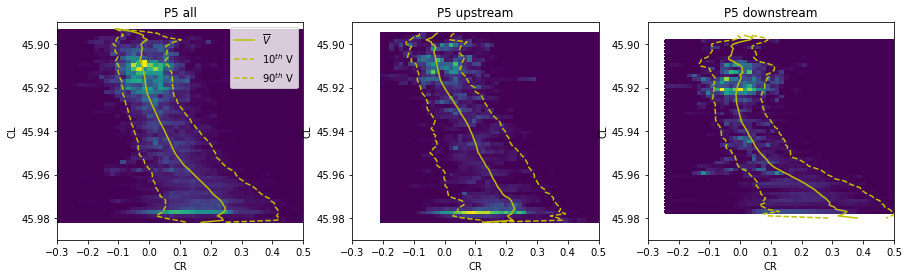

In [25]:
# CR
# all stations 
fig, ax =  plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

nans = (~np.isnan(FGM_towyo_P5.CL_sig4_all.data.flatten()))*(FGM_towyo_P5.GR_all.data.flatten()>=GR_lm)
ax[0].hist2d(FGM_towyo_P5.CR_all.data.flatten()[nans], FGM_towyo_P5.CL_sig4_all.data.flatten()[nans]-1000, bins=50)
ax[0].plot(np.nanmean(V_sig4w, axis=1), sig4w-1000, 'y', label='$\overline{V}$')
ax[0].plot(np.nanpercentile(V_sig4w, 10, axis=1), sig4w-1000, 'y--', label='$10^{th}$ V')
ax[0].plot(np.nanpercentile(V_sig4w, 90, axis=1), sig4w-1000, 'y--', label='$90^{th}$ V')
ax[0].set_ylabel('CL'); ax[0].set_xlabel('CR'); ax[0].set_title('P5 all'); ax[0].legend(); ax[0].set_ylim([45.89,45.99]); ax[0].set_xlim([-.3,.5]); ax[0].invert_yaxis(); 

nans = (~np.isnan(FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()))*(FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()>=GR_lm)
ax[1].hist2d(FGM_towyo_P5.CR_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()[nans], FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT<=-8.2,:,:].data.flatten()[nans]-1000, bins=50)
ax[1].plot(np.nanmean(V_sig4w[:,FGM_towyo_P5.LAT<=-8.2], axis=1), sig4w-1000, 'y', label='V')
ax[1].plot(np.nanpercentile(V_sig4w[:,FGM_towyo_P5.LAT<=-8.2], 10, axis=1), sig4w-1000, 'y--', label='$10^{th}$ V')
ax[1].plot(np.nanpercentile(V_sig4w[:,FGM_towyo_P5.LAT<=-8.2], 90, axis=1), sig4w-1000, 'y--', label='$90^{th}$ V')
ax[1].set_ylabel('CL'); ax[1].set_xlabel('CR'); ax[1].set_title('P5 upstream'); ax[1].set_ylim([45.89,45.99]); ax[1].set_xlim([-.3,.5]); ax[1].invert_yaxis(); 

nans = (~np.isnan(FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()))*(FGM_towyo_P5.GR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()>=GR_lm)
ax[-1].hist2d(FGM_towyo_P5.CR_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()[nans], FGM_towyo_P5.CL_sig4_all[FGM_towyo_P5.LAT>=-8.1,:,:].data.flatten()[nans]-1000, bins=50)
ax[-1].plot(np.nanmean(V_sig4w[:,FGM_towyo_P5.LAT>=-8.1], axis=1), sig4w-1000, 'y', label='V')
ax[-1].plot(np.nanpercentile(V_sig4w[:,FGM_towyo_P5.LAT>=-8.1], 10, axis=1), sig4w-1000, 'y--', label='$10^{th}$ V')
ax[-1].plot(np.nanpercentile(V_sig4w[:,FGM_towyo_P5.LAT>=-8.1], 90, axis=1), sig4w-1000, 'y--', label='$90^{th}$ V')
ax[-1].set_ylabel('CL'); ax[-1].set_xlabel('CR'); ax[-1].set_title('P5 downstream'); ax[-1].set_ylim([45.89,45.99]); ax[-1].set_xlim([-.3,.5]); ax[-1].invert_yaxis(); 


(-1.5, 4.0)

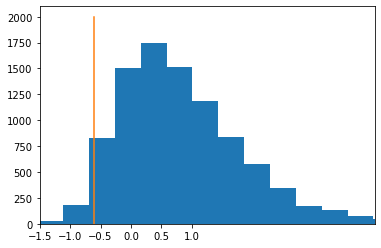

In [26]:
from scipy import stats
plt.hist(np.log10(Ri_sig4w[(sig4w>1045.9)*(sig4w<1045.92),:].flatten()),bins=20)
plt.plot([np.log10(1/4), np.log10(1/4)],[0, 2000])
plt.xticks(np.arange(-1.5,1.5,.5))
plt.xlim([-1.5,4])

(-1.5, 4.0)

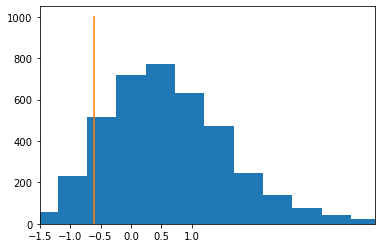

In [27]:
from scipy import stats
plt.hist(np.log10(Ri_sig4w[(sig4w>1045.97)*(sig4w<1045.98),:].flatten()),bins=20)
plt.plot([np.log10(1/4), np.log10(1/4)],[0, 1000])
plt.xticks(np.arange(-1.5,1.5,.5))
plt.xlim([-1.5,4])